In [1]:
from numpy import *
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM

import matplotlib
matplotlib.style.use('publication23')

In [2]:
import tqdm

In [3]:
G2 = np.loadtxt('G2_test.dat', dtype=complex)
G = np.loadtxt('G_test.dat', dtype=complex)
TM = np.loadtxt('T_test.dat', dtype=complex)

erange = np.loadtxt('erange.dat')
qrange = np.loadtxt('qrange.dat')

In [4]:
iImT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(TM)))
iR = tm.Interpolator2D(qrange, erange, ascontiguousarray(-1/pi*imag(G)))

In [5]:
iEps = tm.Interpolator(qrange, sqrt(0.6**2 + qrange**2), 'cubic')


In [6]:
qrange_plot = [0, 0.25, 0.5]
erange_plot = erange[::2]

In [ ]:
ss1 = [array([tm.sigma_ff_onshell2(e, q, 0.2, iImT, iR, iEps, iEps, 0) for e in tqdm.notebook.tqdm(erange_plot)])
      for q in qrange_plot]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

In [ ]:
ss2 = [array([tm.Efirst_k_integral(e, q, 0.2, iImT, iR, iEps, iEps, 0) for e in tqdm.notebook.tqdm(erange_plot)])
     for q in qrange_plot]

In [ ]:
for s1, s2, q in zip(ss1, ss2, qrange_plot):
    l, = plt.plot(erange_plot, s1)
    plt.plot(erange_plot, s2, c=l.get_c(), ls='--')

plt.xlim(0, 2)

## Checking the integrand at finite q

In [11]:
k = 0.5
x = 0.5

In [15]:
int1 = array([tm.Efirst_cm_onshell_integrand(e, 0.5, 0.5, k, x, 0.2, iImT, iR, iEps, iEps, 0, 0) for e in erange_plot])
int2 = array([tm.x_cm_onshell_integrand2(x, e, 0.5, 0.5, k, 0.2, iImT, iR, iEps, iEps, 0, 0) for e in erange_plot])

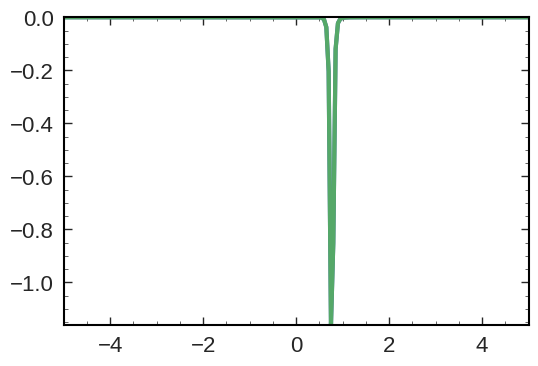

In [16]:
plt.plot(erange_plot, int1)
plt.plot(erange_plot, int2)

In [17]:
int1 - int2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])